In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('bmh')

In [4]:
from datetime import datetime

In [5]:
from IPython.core.display import HTML, display

CSS = """
@import url("https://fonts.googleapis.com/css?family=Fira Mono");

.container {
    width: 97% !important;
    font-size: 100%;
}

span {
    font-family: 'Fira Mono'; color: black;
}

div.output_area pre {
    font-family: 'Fira Mono'; font-size:100%; color:blue;
}

table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 2px solid #ccf;
    background-color: #f4f4ff;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th: not(:empty) {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
    text-align: center;
    font-weight: normal;   
}
table.dataframe tr:nth-child(2) th empty {
    border-left: none;
    border-right: 2px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
"""

HTML(f'<style>{CSS}</style>')

In [6]:
start_date, end_date = '2010-01-01', '2021-01-01'

product_list = ['television', 'book', 'hoodie', 'sandals', 'kale chips', 'rug', 'cutlery set', 'mouse pad', 'toy train', 'gravel']

location_list = ['DE', 'CT', 'NY', 'NJ']
location_prob = [.18, .23, .25, .34]

employee_list = ['Sam', 'Leslie', 'Jes', 'Pat', 'Jo']
employee_prob = [.3, .3, .05, .2, .15]

In [7]:
current_date = datetime.now()
print(current_date)

2021-12-20 16:30:25.498348


In [8]:
N = 37_200

In [9]:
np.random.RandomState(seed=7)

df = pd.DataFrame.from_dict(
    {
        'trans_date': np.random.choice(np.arange(start_date, end_date, dtype='datetime64[D]'), size=N),
        'location': np.random.choice(location_list, size=(N,), p=location_prob),
        'employee': np.random.choice(employee_list, size=(N,), p=employee_prob),
        'product': np.random.choice(product_list, size=(N,),),    
        'sales_hrs': np.random.choice(np.arange(1, 25, 1), size=N),
        'sales_tot': np.random.normal(loc=100, scale=2, size=N)
    }
)

df['doc_date'] = current_date.strftime("%Y-%m-%d %H:%M:%S")
df['actuals'] = np.where(df['trans_date'] <= current_date, True, False)
df.loc[df['trans_date'].dt.year == 2015, ['sales_tot']] = df['sales_tot'] * .82
df.loc[(df['employee'] == 'Jes') & (df['trans_date'].between("2012-01-01", "2014-06-01")), ['sales_hrs']] = 0
df.dropna(axis=0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37200 entries, 0 to 37199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trans_date  37200 non-null  datetime64[ns]
 1   location    37200 non-null  object        
 2   employee    37200 non-null  object        
 3   product     37200 non-null  object        
 4   sales_hrs   37200 non-null  int64         
 5   sales_tot   37200 non-null  float64       
 6   doc_date    37200 non-null  object        
 7   actuals     37200 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [11]:
df.head()

,trans_date,location,employee,product,sales_hrs,sales_tot,doc_date,actuals
0,2016-06-10,CT,Sam,mouse pad,7,98.769839,2021-12-20 16:30:25,True
1,2013-06-01,NJ,Sam,sandals,1,100.036365,2021-12-20 16:30:25,True
2,2013-07-26,NJ,Jo,hoodie,13,98.442852,2021-12-20 16:30:25,True
3,2012-06-21,NJ,Jo,gravel,9,102.822280,2021-12-20 16:30:25,True
4,2010-07-20,CT,Leslie,kale chips,5,102.191680,2021-12-20 16:30:25,True


In [12]:
df.sample()

,trans_date,location,employee,product,sales_hrs,sales_tot,doc_date,actuals
11235,2013-10-26,NY,Jo,book,6,98.513388,2021-12-20 16:30:25,True


In [13]:
df.describe()

,sales_hrs,sales_tot
count,37200.000000,37200.000000
mean,12.303495,98.394627
std,6.986905,5.497541
min,0.000000,76.265499
25%,6.000000,98.124602
50%,12.000000,99.766879
75%,18.000000,101.208936
max,24.000000,108.602404


In [14]:
df['actuals'].value_counts(dropna=False)

True    37200
Name: actuals, dtype: int64

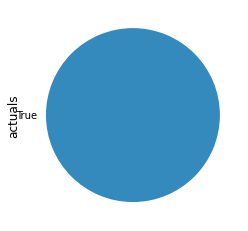

In [15]:
df['actuals'].value_counts(dropna=False).plot.pie();

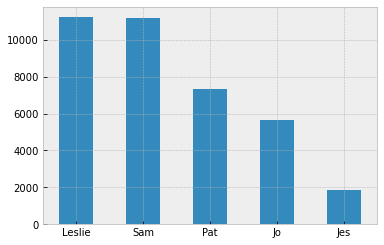

In [16]:
df['employee'].value_counts(dropna=False).plot.bar(rot=0);

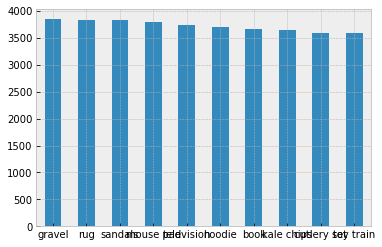

In [17]:
df['product'].value_counts(dropna=False).plot.bar(rot=0);

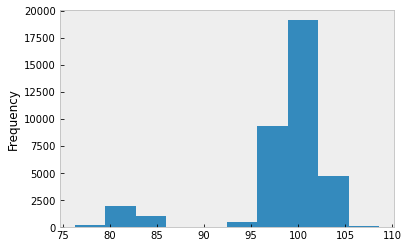

In [18]:
df['sales_tot'].plot.hist(grid=False);

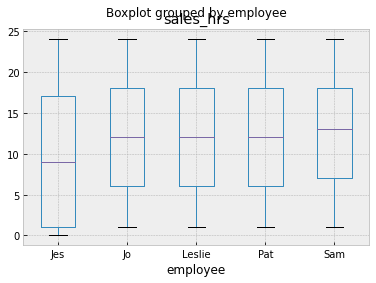

In [19]:
df.boxplot(column='sales_hrs', by='employee');

In [20]:
df.groupby('trans_date').sum()

,sales_hrs,sales_tot,actuals
trans_date,,,
2010-01-01,103,794.965410,8.0
2010-01-02,93,693.877360,7.0
2010-01-03,133,893.393376,9.0
2010-01-04,103,1000.448759,10.0
2010-01-05,103,794.704927,8.0
...,...,...,...
2020-12-27,141,1200.516975,12.0
2020-12-28,154,1103.034086,11.0
2020-12-29,222,1692.477894,17.0


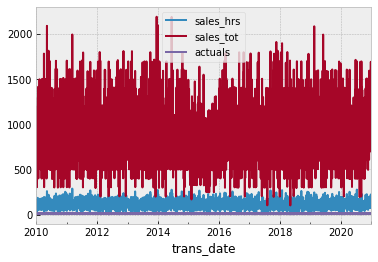

In [21]:
df.groupby('trans_date').sum().plot();

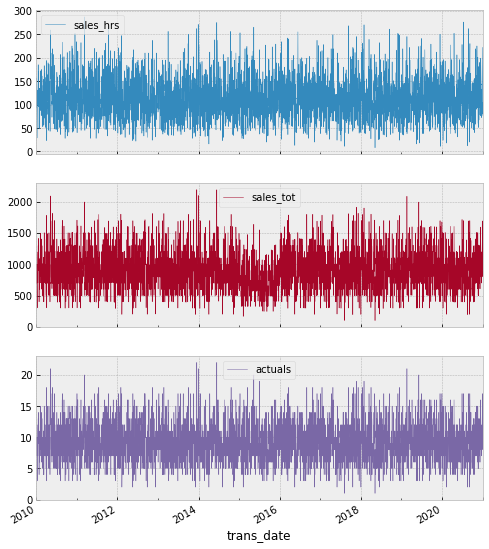

In [22]:
df.groupby('trans_date').sum().plot(subplots=True, figsize=(8,10), lw=.5);

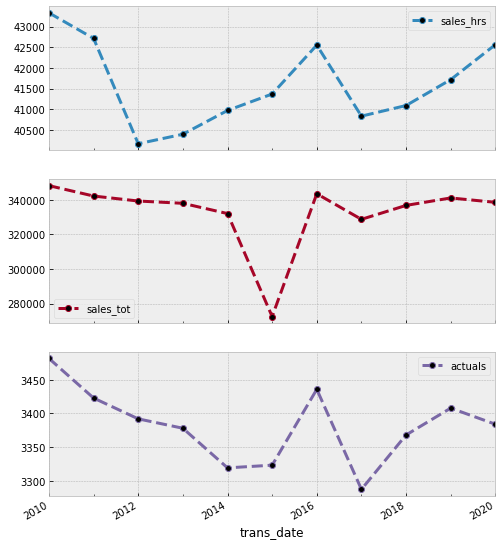

In [23]:
df.groupby(pd.Grouper(key='trans_date', freq='Y')).sum()\
.plot(subplots=True, marker='o', markerfacecolor='k', lw=3, ls='--', figsize=(8,10));

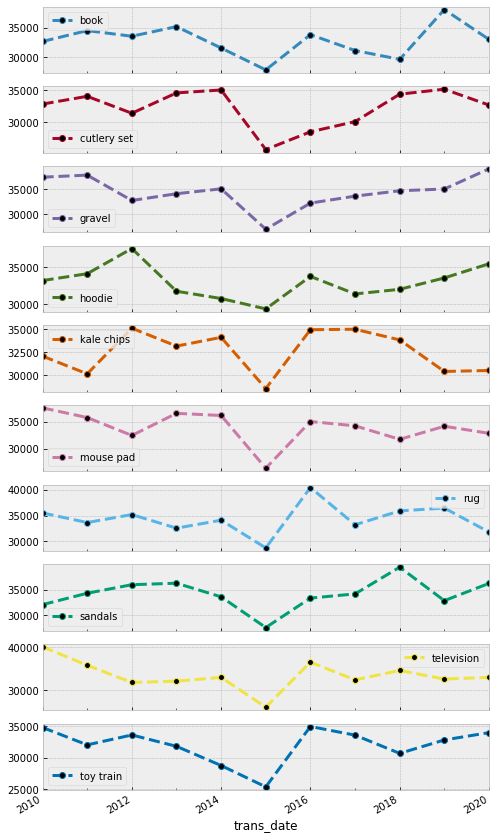

In [24]:
df.groupby([pd.Grouper(key='trans_date', freq='Y'), 'product'])['sales_tot'].sum().unstack('product')\
.plot(subplots=True, marker='o', markerfacecolor='k', lw=3, ls='--', figsize=(8,16));